<a href="https://colab.research.google.com/github/marinathomas/SentimentAnalysisHN/blob/master/2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
from google.colab import drive
import pandas as pd


drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip install vaderSentiment

In [0]:
root_path = "/content/gdrive/Shared drives/HackerNews:SentimentAnalysis/"

In [0]:
csv_file = root_path +  "hackernews_full/2016.csv"
stories = pd.read_csv(csv_file, index_col=0) 

In [5]:
#def get_comments():
csv_file = root_path +  "hackernews_full/coments_2016.csv"
comments_temp_2016 = pd.read_csv(csv_file, index_col=0, header=0)
comments_temp_2016.shape 


/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(2036678, 14)

In [6]:
csv_file = root_path +  "hackernews_full/coments_2017.csv"
comments_temp_2017 = pd.read_csv(csv_file, index_col=0, header=0)
comments_temp_2017.shape

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(2295314, 14)

In [0]:

all_comments = pd.concat([comments_temp_2016, comments_temp_2017], ignore_index=True)

In [8]:
all_comments.shape

(4331992, 14)

In [9]:
stories.head()

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,"Show HN: Ply, a property list interrogator, su...",https://github.com/DHowett/go-plist/tree/maste...,NaN,NaN,DHowett,6,1451613407,2016-01-01 01:56:47+00:00,story,10820788,NaN,1.0,NaN,NaN
1,Show HN: Adding transactional rollback flow fo...,https://github.com/Emblem21/janus-transaction,NaN,NaN,emblem21,2,1451619375,2016-01-01 03:36:15+00:00,story,10821025,NaN,0.0,NaN,NaN
2,Show HN: Shuffling strings based on string-bas...,https://github.com/Emblem21/janus-shuffle,NaN,NaN,emblem21,3,1451623513,2016-01-01 04:45:13+00:00,story,10821118,NaN,0.0,NaN,NaN
3,Show HN: Maker Challenge 2016,http://megamaker.co/challenge/,NaN,NaN,itengelhardt,3,1451642838,2016-01-01 10:07:18+00:00,story,10821530,NaN,0.0,NaN,NaN
4,Show HN: Implementation of Methods for Power-L...,https://github.com/shagunsodhani/powerlaw,NaN,NaN,shagunsodhani,6,1451653031,2016-01-01 12:57:11+00:00,story,10821768,NaN,2.0,NaN,NaN


In [10]:
all_comments.head()

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,NaN,NaN,Have you done a write-up of how you&#x27;ve ma...,NaN,pbowyer,NaN,1451606408,2016-01-01 00:00:08+00:00,comment,10820436,10820385,NaN,NaN,NaN
1,NaN,NaN,My message to the attackers (in case they happ...,NaN,rebootthesystem,NaN,1451606419,2016-01-01 00:00:19+00:00,comment,10820437,10820052,NaN,NaN,NaN
2,NaN,NaN,I&#x27;m willing to bet it&#x27;s someone with...,NaN,atom_enger,NaN,1451606431,2016-01-01 00:00:31+00:00,comment,10820438,10820397,NaN,NaN,NaN
3,NaN,NaN,That&#x27;s a nice trap there. If I don&#x27;t...,NaN,andallas,NaN,1451606452,2016-01-01 00:00:52+00:00,comment,10820440,10820086,NaN,NaN,NaN
4,NaN,NaN,No This is about maintaining the productivity ...,NaN,Jogyn,NaN,1451606453,2016-01-01 00:00:53+00:00,comment,10820441,10820128,NaN,NaN,NaN


In [34]:
stories.shape

(4879, 14)

In [0]:
stories = stories.loc[stories['descendants']>0]

In [13]:
stories.shape

(4879, 14)

In [0]:
comments_2016 = pd.DataFrame()
story_with_comments_2016 = pd.DataFrame()

In [0]:
#for index in range(4870,4879):
for index, story in stories.iterrows():
  #story = stories.iloc[index]
  id = story.loc['id']
  #print(story)
  story_comments = all_comments.loc[all_comments['parent']== id]
  #print(story_comments)
  if not story_comments.empty:
    comments_2016 = pd.concat([comments_2016,story_comments], ignore_index=True)
    #story['no_of_comments'] = comments_2016.shape[0]
    story_with_comments_2016 = story_with_comments_2016.append(story)
    story_with_comments_2016.at[index,'no_of_comments'] = story_comments.shape[0]
    #break;


In [16]:
story_with_comments_2016.head()

,by,dead,deleted,descendants,id,parent,ranking,score,text,time,timestamp,title,type,url,no_of_comments
0,DHowett,NaN,NaN,1.0,10820788.0,NaN,NaN,6.0,NaN,1.451613e+09,2016-01-01 01:56:47+00:00,"Show HN: Ply, a property list interrogator, su...",story,https://github.com/DHowett/go-plist/tree/maste...,1.0
4,shagunsodhani,NaN,NaN,2.0,10821768.0,NaN,NaN,6.0,NaN,1.451653e+09,2016-01-01 12:57:11+00:00,Show HN: Implementation of Methods for Power-L...,story,https://github.com/shagunsodhani/powerlaw,1.0
10,omegote,NaN,NaN,4.0,10822627.0,NaN,NaN,14.0,NaN,1.451672e+09,2016-01-01 18:09:28+00:00,"Show HN: MindMapIt, a simple webapp to create ...",story,http://josetomastocino.github.io/mindmapit/,2.0
13,dany74q,NaN,NaN,1.0,10823098.0,NaN,NaN,2.0,NaN,1.451678e+09,2016-01-01 19:55:22+00:00,Show HN: MuliTranslator – Translate a word/phr...,story,http://multitranslator.pythonanywhere.com,1.0
15,slimsag,NaN,NaN,2.0,10823908.0,NaN,NaN,5.0,NaN,1.451689e+09,2016-01-01 22:55:43+00:00,Show HN: GigaSecond,story,http://gigasecond.github.io/,2.0


In [17]:
story_with_comments_2016.shape

(4875, 15)

In [18]:
story_with_comments_2016[4870:]

,by,dead,deleted,descendants,id,parent,ranking,score,text,time,timestamp,title,type,url,no_of_comments
10746,ganadiniakshay,NaN,NaN,1.0,13291390.0,NaN,NaN,3.0,NaN,1.483198e+09,2016-12-31 15:27:46+00:00,"Show HN: Airfi, a bot to find wifi passwords a...",story,https://m.me/1194578137263075,1.0
10748,cylo,NaN,NaN,1.0,13292267.0,NaN,NaN,14.0,NaN,1.483208e+09,2016-12-31 18:13:28+00:00,Show HN: Every haiku that happened on Reddit c...,story,http://haiku.somebullshit.net,1.0
10749,colinmcd,NaN,NaN,35.0,13292636.0,NaN,NaN,43.0,NaN,1.483212e+09,2016-12-31 19:23:30+00:00,"Show HN: JournalJerk – In 2017, keep a journal...",story,https://www.journaljerk.com,20.0
10750,traviswingo,NaN,NaN,54.0,13292663.0,NaN,NaN,77.0,NaN,1.483212e+09,2016-12-31 19:27:09+00:00,"Show HN: Send a Custom Postcard to Anywhere, f...",story,https://postcardbot.co/#hn2,21.0
10751,adamweld,NaN,NaN,4.0,13292825.0,NaN,NaN,13.0,NaN,1.483214e+09,2016-12-31 19:52:00+00:00,Show HN: My boot-strapped robotics side projec...,story,https://hoverbot.io/,2.0


In [19]:
comments_2016.shape

(19174, 14)

In [20]:
story_with_comments_2016.shape

(4875, 15)

In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [0]:
def analyse_comment(row):
    sentence = row['text']
    score = analyser.polarity_scores(str(sentence))
    return score

In [0]:
comments_2016['vader_score'] = comments_2016.apply(analyse_comment, axis=1)

In [24]:
comments_2016.head()

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted,vader_score
0,NaN,NaN,"I like this a lot, but what is the use-case?",NaN,fiatjaf,NaN,1451648417,2016-01-01 11:40:17+00:00,comment,10821660,10820788,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound..."
1,NaN,NaN,Why did you bother implementing the linear reg...,NaN,GFK_of_xmaspast,NaN,1451675544,2016-01-01 19:12:24+00:00,comment,10822916,10821768,NaN,NaN,NaN,"{'neg': 0.298, 'neu': 0.702, 'pos': 0.0, 'comp..."
2,NaN,NaN,Winner!,NaN,webwanderings,NaN,1451676030,2016-01-01 19:20:30+00:00,comment,10822951,10822627,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
3,NaN,NaN,Thank you using YAML!,NaN,fiatjaf,NaN,1451689729,2016-01-01 23:08:49+00:00,comment,10823970,10822627,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 0.518, 'pos': 0.482, 'comp..."
4,NaN,NaN,Looks quite powerful. Are you using google tra...,NaN,uberneo,NaN,1451926232,2016-01-04 16:50:32+00:00,comment,10836623,10823098,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp..."


In [0]:
comments_csv_file = root_path +  "results/2016/comments.csv"
comments_2016 = pd.read_csv(comments_csv_file, index_col=0) 
stories_csv_file = root_path +  "results/2016/stories.csv"
story_with_comments_2016 = pd.read_csv(stories_csv_file, index_col=0)

Plot stories to number of comments

In [0]:
import matplotlib.pyplot as plt
import numpy as np


<function matplotlib.pyplot.show>

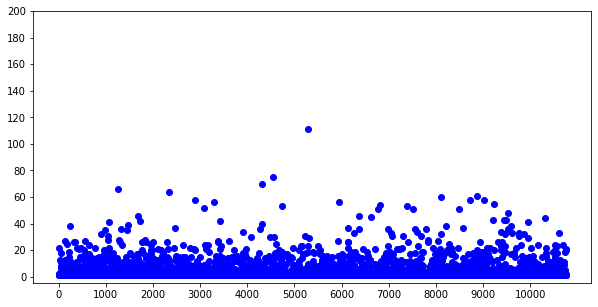

In [50]:
#df.apply(lambda x: plt.scatter(story_with_comments_2016.index, story_with_comments_2016['no_of_comments'], c='g'))
x = story_with_comments_2016.index
y = story_with_comments_2016['no_of_comments']
plt.figure(figsize=(10,5))
plt.plot(x, y, 'bo')
plt.xticks(np.arange(0, max(x)+1, 1000))
plt.yticks(np.arange(0, max(y)+100, 20))
plt.show

In [52]:
print(story_with_comments_2016['no_of_comments'].min())

1.0


In [54]:
print(story_with_comments_2016['no_of_comments'].mean())

3.933128205128205


In [0]:
for index, story in story_with_comments_2016.iterrows():
  parent_id = story['id'] 
  comments = comments_2016.loc[comments_2016['parent'] == parent_id]
  story_with_comments_2016.at[index,'max_neg'] = pd.DataFrame(list(comments['vader_score']))['neg'].max()
  story_with_comments_2016.at[index,'avg_neg'] = pd.DataFrame(list(comments['vader_score']))['neg'].mean()
  
  story_with_comments_2016.at[index,'max_pos'] = pd.DataFrame(list(comments['vader_score']))['pos'].max()
  story_with_comments_2016.at[index,'avg_pos'] = pd.DataFrame(list(comments['vader_score']))['pos'].mean()
  
  story_with_comments_2016.at[index,'max_compound'] = pd.DataFrame(list(comments['vader_score']))['compound'].max()
  story_with_comments_2016.at[index,'min_compound'] = pd.DataFrame(list(comments['vader_score']))['compound'].min()
  story_with_comments_2016.at[index,'avg_compound'] = pd.DataFrame(list(comments['vader_score']))['compound'].mean()
  #break


In [34]:
story_with_comments_2016.head()

,by,dead,deleted,descendants,id,parent,ranking,score,text,time,timestamp,title,type,url,no_of_comments,max_neg,avg_neg,max_pos,avg_pos,max_compound,min_compound,avg_compound
0,DHowett,NaN,NaN,1.0,10820788.0,NaN,NaN,6.0,NaN,1.451613e+09,2016-01-01 01:56:47+00:00,"Show HN: Ply, a property list interrogator, su...",story,https://github.com/DHowett/go-plist/tree/maste...,1.0,0.000,0.000,0.200,0.2000,0.1901,0.1901,0.1901
4,shagunsodhani,NaN,NaN,2.0,10821768.0,NaN,NaN,6.0,NaN,1.451653e+09,2016-01-01 12:57:11+00:00,Show HN: Implementation of Methods for Power-L...,story,https://github.com/shagunsodhani/powerlaw,1.0,0.298,0.298,0.000,0.0000,-0.6249,-0.6249,-0.6249
10,omegote,NaN,NaN,4.0,10822627.0,NaN,NaN,14.0,NaN,1.451672e+09,2016-01-01 18:09:28+00:00,"Show HN: MindMapIt, a simple webapp to create ...",story,http://josetomastocino.github.io/mindmapit/,2.0,0.000,0.000,1.000,0.7410,0.6239,0.4199,0.5219
13,dany74q,NaN,NaN,1.0,10823098.0,NaN,NaN,2.0,NaN,1.451678e+09,2016-01-01 19:55:22+00:00,Show HN: MuliTranslator – Translate a word/phr...,story,http://multitranslator.pythonanywhere.com,1.0,0.000,0.000,0.279,0.2790,0.4754,0.4754,0.4754
15,slimsag,NaN,NaN,2.0,10823908.0,NaN,NaN,5.0,NaN,1.451689e+09,2016-01-01 22:55:43+00:00,Show HN: GigaSecond,story,http://gigasecond.github.io/,2.0,0.068,0.034,0.185,0.0925,0.5562,0.0000,0.2781


In [0]:
for index, story in story_with_comments_2016.iterrows():
  parent_id = story['id'] 
  comments = comments_2016.loc[comments_2016['parent'] == parent_id]
  comment_scores = pd.DataFrame(list(comments['vader_score']))
  positive = comment_scores.loc[comment_scores['compound']  >= 0.05]
  negative = comment_scores.loc[comment_scores['compound']  <= -0.05]
  #print(positive.shape)
  #print(negative.shape)
  #print(positive.shape[0] - negative.shape[0])
  story_with_comments_2016.at[index,'vader_story_score'] = positive.shape[0] - negative.shape[0]
  story_with_comments_2016.at[index,'ratio'] = story['no_of_comments']/story['descendants']
  #print(story['no_of_comments']/story['descendants'])

In [37]:
story_with_comments_2016.head()

,by,dead,deleted,descendants,id,parent,ranking,score,text,time,timestamp,title,type,url,no_of_comments,max_neg,avg_neg,max_pos,avg_pos,max_compound,min_compound,avg_compound,vader_story_score,ratio
0,DHowett,NaN,NaN,1.0,10820788.0,NaN,NaN,6.0,NaN,1.451613e+09,2016-01-01 01:56:47+00:00,"Show HN: Ply, a property list interrogator, su...",story,https://github.com/DHowett/go-plist/tree/maste...,1.0,0.000,0.000,0.200,0.2000,0.1901,0.1901,0.1901,1.0,1.0
4,shagunsodhani,NaN,NaN,2.0,10821768.0,NaN,NaN,6.0,NaN,1.451653e+09,2016-01-01 12:57:11+00:00,Show HN: Implementation of Methods for Power-L...,story,https://github.com/shagunsodhani/powerlaw,1.0,0.298,0.298,0.000,0.0000,-0.6249,-0.6249,-0.6249,-1.0,0.5
10,omegote,NaN,NaN,4.0,10822627.0,NaN,NaN,14.0,NaN,1.451672e+09,2016-01-01 18:09:28+00:00,"Show HN: MindMapIt, a simple webapp to create ...",story,http://josetomastocino.github.io/mindmapit/,2.0,0.000,0.000,1.000,0.7410,0.6239,0.4199,0.5219,2.0,0.5
13,dany74q,NaN,NaN,1.0,10823098.0,NaN,NaN,2.0,NaN,1.451678e+09,2016-01-01 19:55:22+00:00,Show HN: MuliTranslator – Translate a word/phr...,story,http://multitranslator.pythonanywhere.com,1.0,0.000,0.000,0.279,0.2790,0.4754,0.4754,0.4754,1.0,1.0
15,slimsag,NaN,NaN,2.0,10823908.0,NaN,NaN,5.0,NaN,1.451689e+09,2016-01-01 22:55:43+00:00,Show HN: GigaSecond,story,http://gigasecond.github.io/,2.0,0.068,0.034,0.185,0.0925,0.5562,0.0000,0.2781,1.0,1.0


In [0]:
comments_csv_file = root_path +  "results/2016/comments.csv"
comments_2016.to_csv(comments_csv_file)
stories_csv_file = root_path +  "results/2016/stories.csv"
story_with_comments_2016.to_csv(stories_csv_file)

In [38]:
comments = comments_2016.loc[comments_2016['parent'] == 13292663]
print(pd.DataFrame(list(comments['vader_score']))['neg'].max())
print(pd.DataFrame(list(comments['vader_score']))['neg'].mean())

0.169
0.02757142857142857


In [39]:
print(pd.DataFrame(list(comments['vader_score']))['pos'].max())
print(pd.DataFrame(list(comments['vader_score']))['pos'].mean())
  
print(pd.DataFrame(list(comments['vader_score']))['compound'].max())
print(pd.DataFrame(list(comments['vader_score']))['compound'].min())
print(pd.DataFrame(list(comments['vader_score']))['compound'].mean())

0.643
0.16266666666666665
0.9931
-0.5423
0.3506476190476191


In [17]:
pd.set_option('display.max_columns', None)

               by  dead  deleted  descendants          id  parent  ranking  \
0         DHowett   NaN      NaN          1.0  10820788.0     NaN      NaN   
4   shagunsodhani   NaN      NaN          2.0  10821768.0     NaN      NaN   
10        omegote   NaN      NaN          4.0  10822627.0     NaN      NaN   
13        dany74q   NaN      NaN          1.0  10823098.0     NaN      NaN   
15        slimsag   NaN      NaN          2.0  10823908.0     NaN      NaN   
16            wjd   NaN      NaN         87.0  10824064.0     NaN      NaN   
17      smithgeek   NaN      NaN          1.0  10824399.0     NaN      NaN   
18        bucaran   NaN      NaN         12.0  10824723.0     NaN      NaN   
21      hypallage   NaN      NaN          1.0  10825299.0     NaN      NaN   
22      mc_hammer   NaN      NaN          1.0  10825567.0     NaN      NaN   

    score text          time                  timestamp  \
0     6.0  NaN  1.451613e+09  2016-01-01 01:56:47+00:00   
4     6.0  NaN  1.45165

In [0]:
story_with_comments_2016.to_csv(stories_csv_file)

In [0]:
from dateutil.parser import parse
from datetime import datetime
import numpy as np
import requests
from requests.exceptions import HTTPError
import urllib.request

def get_activity(row):
    try:
        url = row['url']
        if url.find('github.io') != -1:
            url_path = url.split('/')
            url = 'https://api.github.com/repos/' + url_path[3] + '/' + url_path[4] + '/stats/code_frequency'
            response = requests.get(url, headers={'Authorization': 'token  '},)
            res_json = response.json()
            story_post_ts = datetime.timestamp(parse(row['timestamp']))
            if type(res_json) == list:
                for week_change in res_json:
                    interval = week_change[0] - story_post_ts
                    if interval >= 26 * 3600 *24 * 7 and interval <= 52 * 3600 * 24 * 7 and abs(week_change[1]) + abs(week_change[2]) != 0:
                        return True
                return False
            else:
                return False
        else:
            status_code = urllib.request.urlopen(url).getcode() 
            if status_code >= 200 and status_code < 300:
                return True
            else:
                return False
    except Exception as e:
        print(str(e))
        return False

In [41]:
story_with_comments_2016['active'] = story_with_comments_2016.apply(get_activity, axis=1)

HTTP Error 404: Not Found
HTTP Error 404: Not Found
list index out of range
HTTP Error 403: Forbidden
<urlopen error [Errno -2] Name or service not known>
HTTP Error 403: Forbidden
HTTP Error 404: Not Found
'float' object has no attribute 'find'
<urlopen error [Errno -5] No address associated with hostname>
HTTP Error 404: Not Found
<urlopen error [Errno 110] Connection timed out>
HTTP Error 403: Forbidden
<urlopen error [Errno -3] Temporary failure in name resolution>
<urlopen error [Errno -3] Temporary failure in name resolution>
'float' object has no attribute 'find'
HTTP Error 403: Forbidden
<urlopen error [Errno -3] Temporary failure in name resolution>
<urlopen error [Errno -5] No address associated with hostname>
HTTP Error 403: Forbidden
<urlopen error [Errno -2] Name or service not known>
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno 111] Connection refused>
HTTP Error 404: Not Found
<urlopen erro

In [42]:
story_with_comments_2016.head()

,by,dead,deleted,descendants,id,parent,ranking,score,text,time,timestamp,title,type,url,no_of_comments,max_neg,avg_neg,max_pos,avg_pos,max_compound,min_compound,avg_compound,vader_story_score,ratio,active
0,DHowett,NaN,NaN,1.0,10820788.0,NaN,NaN,6.0,NaN,1.451613e+09,2016-01-01 01:56:47+00:00,"Show HN: Ply, a property list interrogator, su...",story,https://github.com/DHowett/go-plist/tree/maste...,1.0,0.000,0.000,0.200,0.2000,0.1901,0.1901,0.1901,1.0,1.0,False
4,shagunsodhani,NaN,NaN,2.0,10821768.0,NaN,NaN,6.0,NaN,1.451653e+09,2016-01-01 12:57:11+00:00,Show HN: Implementation of Methods for Power-L...,story,https://github.com/shagunsodhani/powerlaw,1.0,0.298,0.298,0.000,0.0000,-0.6249,-0.6249,-0.6249,-1.0,0.5,True
10,omegote,NaN,NaN,4.0,10822627.0,NaN,NaN,14.0,NaN,1.451672e+09,2016-01-01 18:09:28+00:00,"Show HN: MindMapIt, a simple webapp to create ...",story,http://josetomastocino.github.io/mindmapit/,2.0,0.000,0.000,1.000,0.7410,0.6239,0.4199,0.5219,2.0,0.5,False
13,dany74q,NaN,NaN,1.0,10823098.0,NaN,NaN,2.0,NaN,1.451678e+09,2016-01-01 19:55:22+00:00,Show HN: MuliTranslator – Translate a word/phr...,story,http://multitranslator.pythonanywhere.com,1.0,0.000,0.000,0.279,0.2790,0.4754,0.4754,0.4754,1.0,1.0,False
15,slimsag,NaN,NaN,2.0,10823908.0,NaN,NaN,5.0,NaN,1.451689e+09,2016-01-01 22:55:43+00:00,Show HN: GigaSecond,story,http://gigasecond.github.io/,2.0,0.068,0.034,0.185,0.0925,0.5562,0.0000,0.2781,1.0,1.0,False


In [0]:
X = story_with_comments_2016[['descendants','score','ratio','vader_story_score','max_neg','avg_neg','max_pos','avg_pos','max_compound','min_compound','avg_compound']]
y = story_with_comments_2016[['active']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


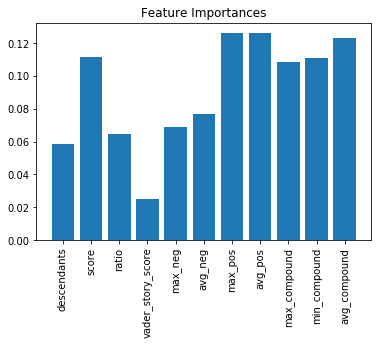

In [45]:
#feature importance to see the sentiment analysis is any important
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

clf = RandomForestClassifier(random_state=0,n_jobs=-1)
m = clf.fit(X,y)

importances = m.feature_importances_

plt.figure()
plt.title('Feature Importances')
plt.bar(range(11),m.feature_importances_)
plt.xticks(range(11),X.columns, rotation=90)
plt.show()
